Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import missingno as ms

In [ ]:
%matplotlib inline

Reading the csv file

In [ ]:
import pandas as pd
data=pd.read_csv('/content/movie.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head(100)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
96,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000
97,Color,Christopher Nolan,642.0,148.0,22000.0,23000.0,Tom Hardy,29000.0,292568851.0,Action|Adventure|Sci-Fi|Thriller,...,2803.0,English,USA,PG-13,160000000.0,2010.0,27000.0,8.8,2.35,175000
98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Data Pre-processing

Correlation between attributes

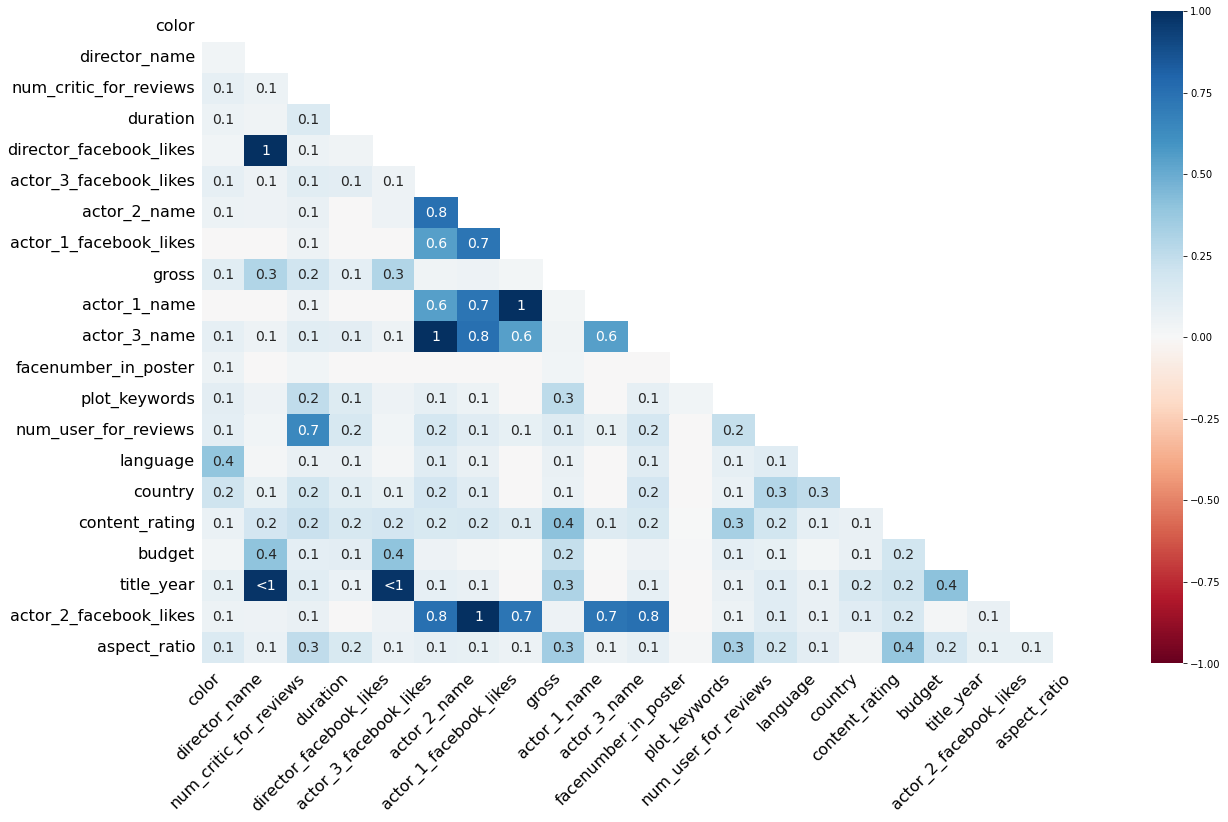

In [ ]:
ms.heatmap(data)

Visualization

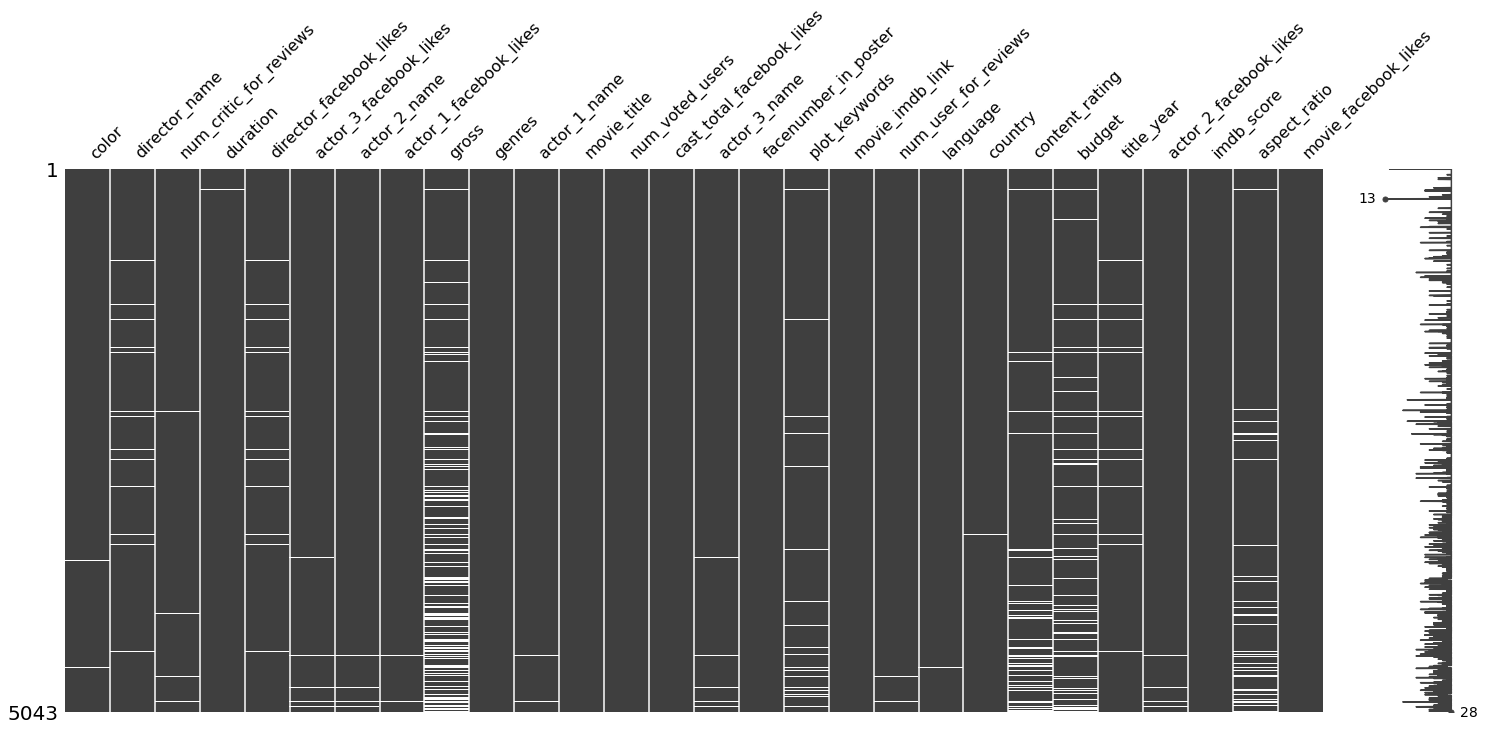

In [ ]:
ms.matrix(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


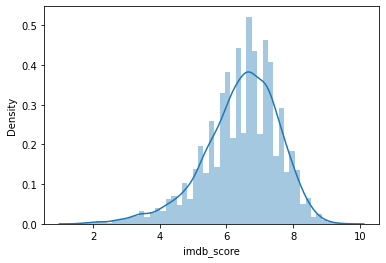

In [ ]:
sns.distplot(data['imdb_score'])

Removing null values

In [ ]:
ndata=data.dropna(inplace=True)
data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

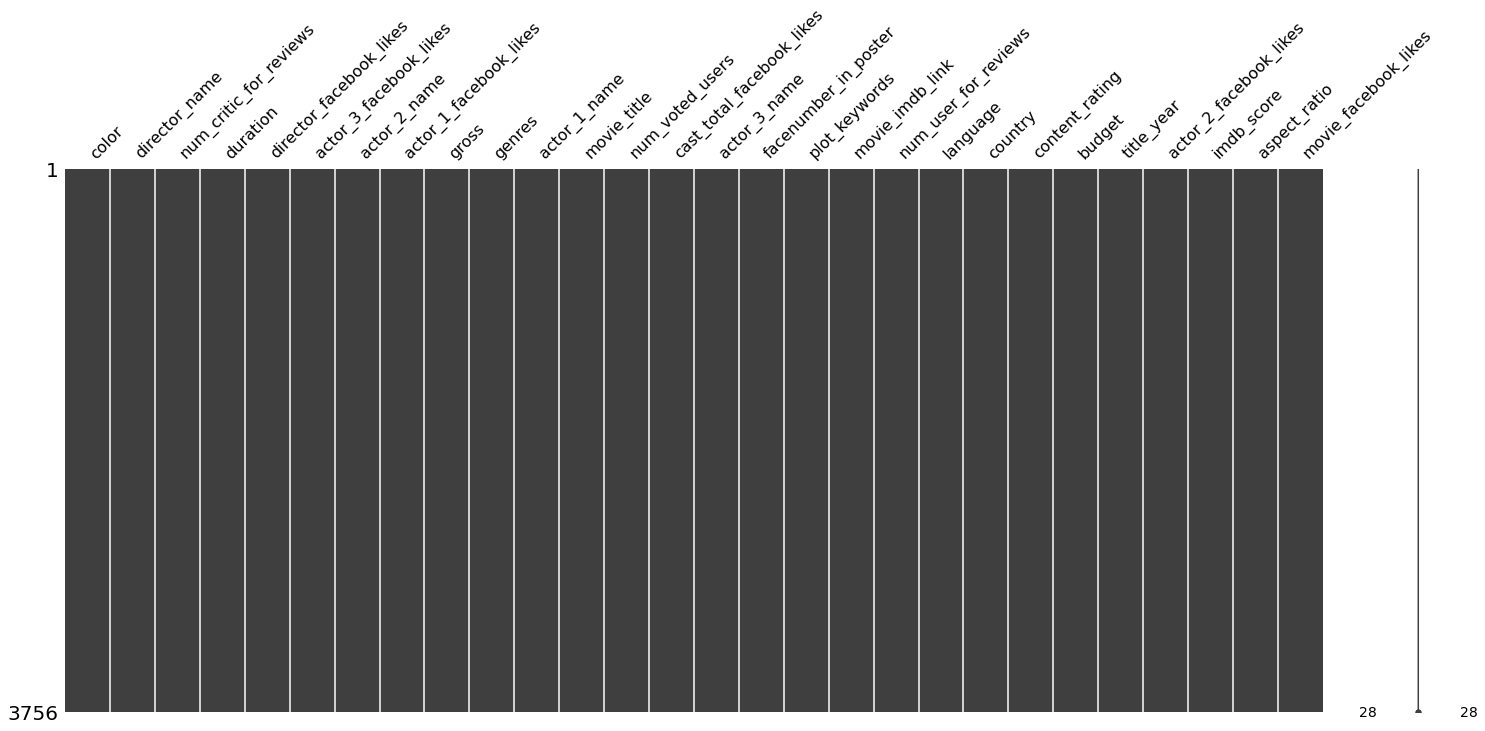

In [ ]:
ms.matrix(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3756 non-null   object 
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3756 non-null   object 
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

In [ ]:
data.shape

(3756, 28)

In [ ]:
x=data.iloc[:,25]
print(x)
print(x.shape)

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
       ... 
5026    6.9
5027    7.5
5033    7.0
5035    6.9
5042    6.6
Name: imdb_score, Length: 3756, dtype: float64
(3756,)


Classifying target values

In [ ]:
l=[]
print(type(x))
print(x[0])

<class 'pandas.core.series.Series'>
7.9


In [ ]:
l=[]
for i in x:
    if(0<=i and i<=4):
        l.append('flop')
    elif(4<i and i<=7):
        l.append('avg')
    elif (7<i and i<=10):
        l.append('hit')
print(len(l))
l = pd.Series(l)
print(l)

3756
0       hit
1       hit
2       avg
3       hit
4       avg
       ... 
3751    avg
3752    hit
3753    avg
3754    avg
3755    avg
Length: 3756, dtype: object


In [ ]:
a=float(input("enter the imdb rating: "))
if(0<=a and a<=4):
    print('flop')
elif(4<a and a<=7):
    print('avg')
elif (7<a and a<=10):
    print('hit')

enter the imdb rating: 5.7
avg


Creating dataframe for selected attributes

In [ ]:
fdata=data[["num_critic_for_reviews","director_facebook_likes","actor_3_facebook_likes","actor_1_facebook_likes","num_voted_users"]]

In [ ]:
print(fdata)


      num_critic_for_reviews  director_facebook_likes  actor_3_facebook_likes  \
0                      723.0                      0.0                   855.0   
1                      302.0                    563.0                  1000.0   
2                      602.0                      0.0                   161.0   
3                      813.0                  22000.0                 23000.0   
5                      462.0                    475.0                   530.0   
...                      ...                      ...                     ...   
5026                    81.0                    107.0                    45.0   
5027                    64.0                    397.0                     0.0   
5033                   143.0                    291.0                     8.0   
5035                    56.0                      0.0                     6.0   
5042                    43.0                     16.0                    16.0   

      actor_1_facebook_like

In [ ]:
print(data.shape)

(3756, 28)


Model selection

Training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(fdata,l,test_size=0.30,random_state=101)

Training the model

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, Y_train) 


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(Y_test, knn_predictions) 
print(cm)


[[659   0 112]
 [ 27   0   0]
 [191   0 138]]


Accuracy

In [ ]:
 accuracy = knn.score(X_test, Y_test) 
print (accuracy)

0.707187222715173


In [ ]:
from sklearn.metrics import accuracy_score 
print ('Accuracy Score :',accuracy_score(Y_test, knn_predictions))

Accuracy Score : 0.707187222715173


Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, Y_train) 
gnb_predictions = gnb.predict(X_test) 

Confusion matrix

In [ ]:
cm = confusion_matrix(Y_test, gnb_predictions)
print(cm)

[[300 393  78]
 [  5  22   0]
 [131  87 111]]



Accuracy

In [ ]:
accuracy = gnb.score(X_test, Y_test) 
print ('Accuracy score: ',accuracy)

Accuracy score:  0.3842058562555457


Logistic Regression


Target values:

In [ ]:
print(x)

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
       ... 
5026    6.9
5027    7.5
5033    7.0
5035    6.9
5042    6.6
Name: imdb_score, Length: 3756, dtype: float64


Attributes taken as inputs:

In [ ]:
print(fdata)

      num_critic_for_reviews  director_facebook_likes  actor_3_facebook_likes  \
0                      723.0                      0.0                   855.0   
1                      302.0                    563.0                  1000.0   
2                      602.0                      0.0                   161.0   
3                      813.0                  22000.0                 23000.0   
5                      462.0                    475.0                   530.0   
...                      ...                      ...                     ...   
5026                    81.0                    107.0                    45.0   
5027                    64.0                    397.0                     0.0   
5033                   143.0                    291.0                     8.0   
5035                    56.0                      0.0                     6.0   
5042                    43.0                     16.0                    16.0   

      actor_1_facebook_like

Training and Testing:

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(fdata,l,test_size=0.30,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predicted =  logmodel.predict(X_test)
predicted

array(['avg', 'hit', 'avg', ..., 'avg', 'hit', 'hit'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(Y_test, predicted))

[[679   0  92]
 [ 26   0   1]
 [199   0 130]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

         avg       0.75      0.88      0.81       771
        flop       0.00      0.00      0.00        27
         hit       0.58      0.40      0.47       329

    accuracy                           0.72      1127
   macro avg       0.44      0.43      0.43      1127
weighted avg       0.68      0.72      0.69      1127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
